Chapter 26
# 平面点线投影
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_iris
from sklearn.covariance import EmpiricalCovariance

import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 自定义函数

In [2]:
def normal_pdf_1d(x, mu,sigma):
    
    # 一元高斯分布PDF函数
    
    scaling = 1/sigma/np.sqrt(2*np.pi)
    z = (x - mu)/sigma
    pdf = scaling*np.exp(-z**2/2)
    
    return pdf

def draw_vector(vector,RBG): 
    # 绘制箭头图
    
    array = np.array([[0, 0, vector[0], vector[1]]], dtype=object)
    X, Y, U, V = zip(*array)
    plt.quiver(X, Y, U, V,angles='xy', scale_units='xy',scale=1,color = RBG)

### 导入数据

In [3]:
iris_sns = sns.load_dataset("iris") 

### 处理数据

In [3]:
# 加载数据
iris_sns = sns.load_dataset("iris") 
# 将数据帧转化为numpy数组
X = iris_sns.to_numpy()

X = np.array(X[:,:4])
x1 = X[:,:2]
# 取出鸢尾花数据集前两列

xx_maha, yy_maha = np.meshgrid(
            np.linspace(0,10, 400),
            np.linspace(0,10, 400),)
# 产生网格化数据

zz_maha = np.c_[xx_maha.ravel(), yy_maha.ravel()]
# 合并

emp_cov_Xc = EmpiricalCovariance().fit(x1)
# 计算协方差矩阵

mahal_sq_Xc = emp_cov_Xc.mahalanobis(zz_maha)
# 计算马氏距离平方

mahal_sq_Xc = mahal_sq_Xc.reshape(xx_maha.shape)
mahal_d_Xc = np.sqrt(mahal_sq_Xc)
# 开平方得到马氏距离

### 可视化

theta = 0.0
std1 = 0.8253012917851409
theta = 15.0
std1 = 0.7918721461597277
theta = 30.0
std1 = 0.7221606163928674
theta = 45.0
std1 = 0.6267108140477908
theta = 60.0
std1 = 0.5247011427491459
theta = 75.0
std1 = 0.44790903556010886
theta = 90.0
std1 = 0.4344109677354944


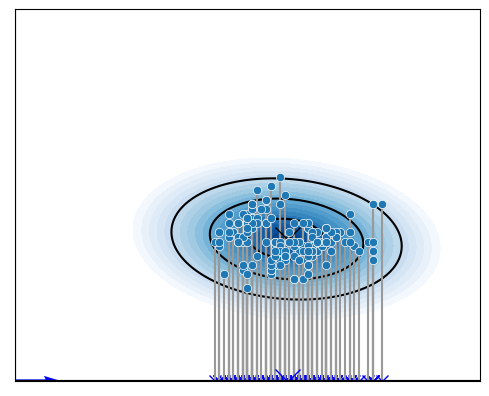

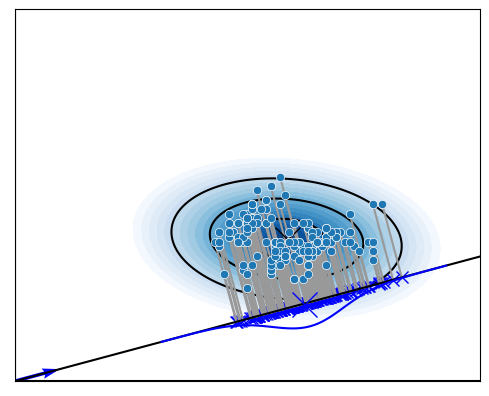

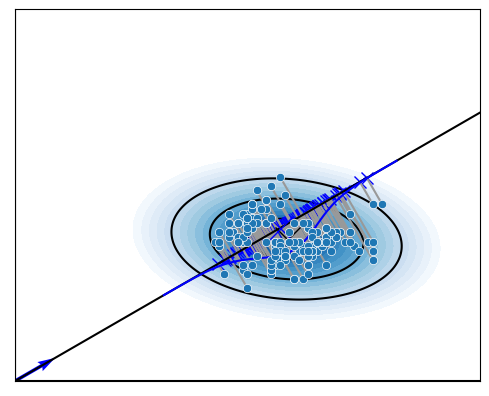

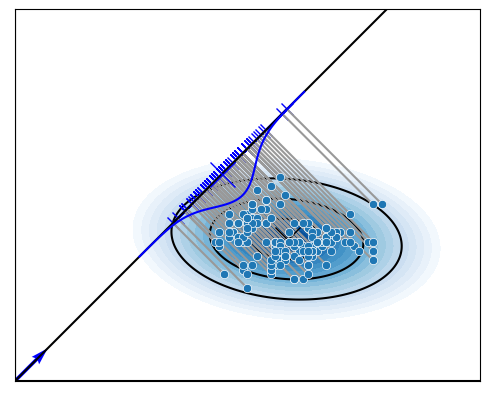

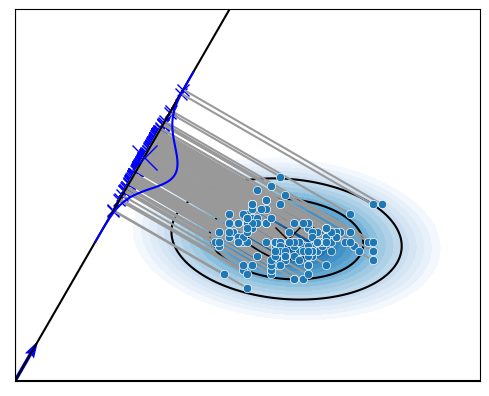

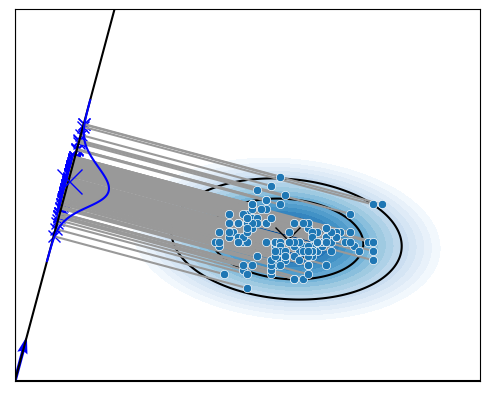

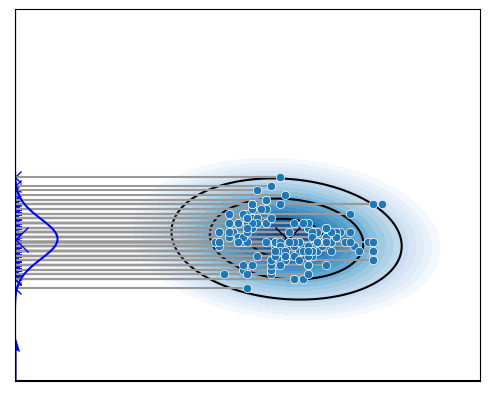

In [13]:
theta_array = np.linspace(0,90,7)
# 不同的投影角度

for theta_deg in theta_array:

    print('====================')
    print('theta = ' + str(theta_deg))
    theta = theta_deg*np.pi/180

    v1 = np.array([[np.cos(theta)],
                   [np.sin(theta)]])
    # 通过原点直线对应的单位切向量

    T1 = v1@v1.T
    z1_1D = x1@v1
    # 一次投影，得到投影点在v1向量上坐标
    
    z1_2D = x1@T1
    # 二次投影，得到投影点在xy平面的坐标

    mu1 = z1_1D.mean()
    std1 = z1_1D.std()
    # 计算投影点的统计量：均值、标准差

    print('std1 = ' + str(std1))

    x1_array = np.linspace(mu1 - 4*std1,mu1 + 4*std1,100)

    R1 = np.array([[np.cos(theta), np.sin(theta)],
                  [-np.sin(theta), np.cos(theta)]])

    pdf1_array = normal_pdf_1d(x1_array,mu1,std1)

    PDF1 = np.column_stack((x1_array,-pdf1_array))
    PDF1_v1 = PDF1@R1
    # 旋转一元高斯PDF曲线

    fig, ax = plt.subplots(figsize = (6,6))
    
    # 绘制马氏距离等高线
    plt.contourf(xx_maha, yy_maha, mahal_d_Xc, cmap='Blues_r', levels=np.linspace(0,4,21))
    plt.contour(xx_maha, yy_maha, mahal_d_Xc, colors='k', levels=[1,2,3])
    
    # 绘制样本数据散点
    ax = sns.scatterplot(x=x1[:,0], y=x1[:,1], zorder = 1e3)
    
    # 绘制投影点
    plt.plot(z1_2D[:,0],z1_2D[:,1], marker = 'x', markersize = 8, color = 'b')
    
    # 绘制原始数据、投影点之间的连线
    plt.plot(([i for (i,j) in z1_2D], [i for (i,j) in x1]),
             ([j for (i,j) in z1_2D], [j for (i,j) in x1]),c=[0.6,0.6,0.6])
    
    # 绘制过原点的投影直线
    plt.plot((-10,10),(-10*np.tan(theta),10*np.tan(theta)),c = 'k')

    # 投影一元高斯PDF曲线
    plt.plot(PDF1_v1[:,0],PDF1_v1[:,1], 
             color = 'b')

    # 绘制质心、投影质心
    plt.plot(x1[:,0].mean(),x1[:,1].mean(), 
             marker = 'x',
             color = 'k', 
             markersize = 18)

    plt.plot(z1_2D[:,0].mean(),z1_2D[:,1].mean(), 
             marker = 'x',
             color = 'b',
             markersize = 18)

    # 绘制箭头
    draw_vector(v1,'b')


    ax.axvline(x = 0, c = 'k')
    ax.axhline(y = 0, c = 'k')
    ax.axis('scaled')
    ax.set_xbound(lower = 0, upper = 10)
    ax.set_ybound(lower = 0, upper = 8)
    
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

    fig.savefig('Figures/投影角度_theta_' + str(theta_deg) + '_degrees.svg', format='svg')

In [5]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023